# YAP 470 - PROJECT

In [1]:
import networkx as nx
import random

ModuleNotFoundError: No module named 'networkx'

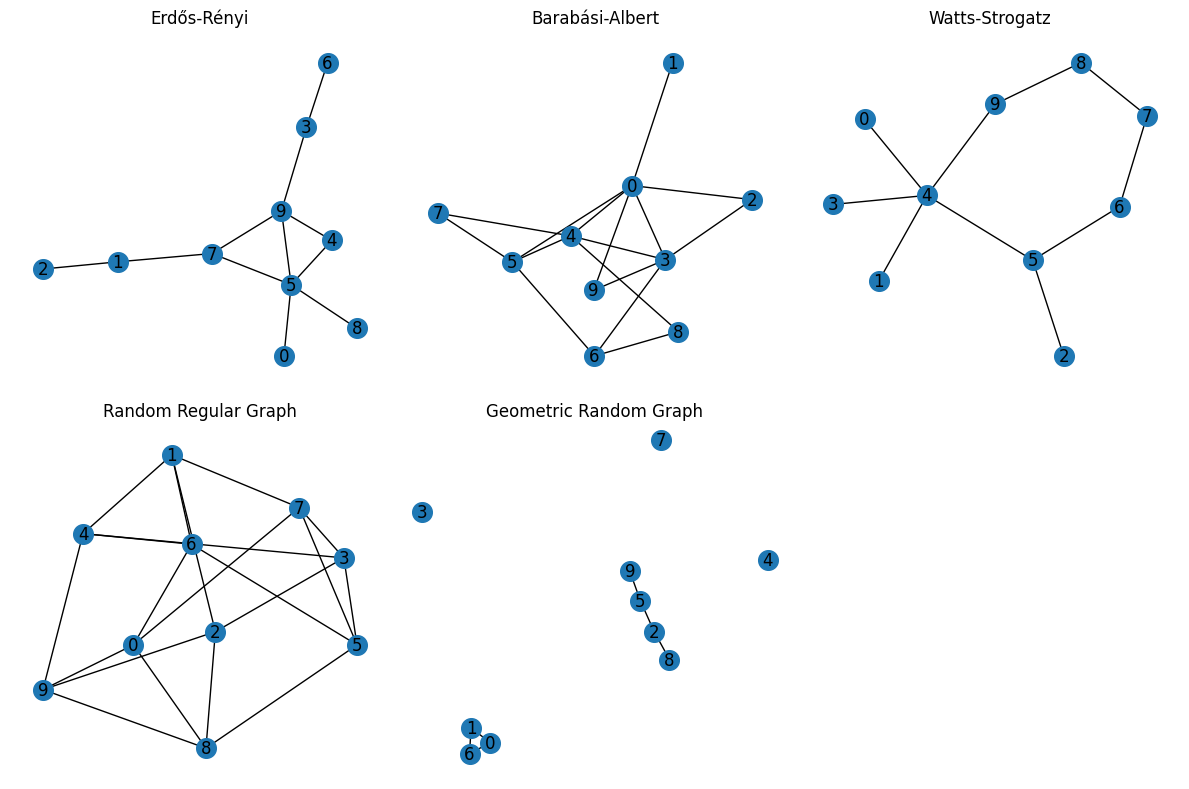

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph with the Erdős-Rényi model (G(n, p))
n = 10  # Number of nodes
p = 0.2  # Probability of edge existence
random_graph_er = nx.erdos_renyi_graph(n, p)

# Create a random graph with the Barabási-Albert model (preferential attachment)
m = 2  # Number of edges to attach from a new node to existing nodes
random_graph_ba = nx.barabasi_albert_graph(n, m)

# Create a random graph with the Watts-Strogatz model (small-world graph)
k = 2  # Each node is connected to k nearest neighbors
p = 0.3  # Probability of rewiring each edge
random_graph_ws = nx.watts_strogatz_graph(n, k, p)

# Create a random graph with the Random Regular Graph model
d = 4  # Degree of each node
random_graph_rrg = nx.random_regular_graph(d, n)

# Create a random graph with the Geometric Random Graph model
random_graph_geometric = nx.random_geometric_graph(n, 0.3)

# Plot the random graphs
plt.figure(figsize=(12, 8))
plt.subplot(231)
nx.draw(random_graph_er, with_labels=True, node_size=200)
plt.title("Erdős-Rényi")

plt.subplot(232)
nx.draw(random_graph_ba, with_labels=True, node_size=200)
plt.title("Barabási-Albert")

plt.subplot(233)
nx.draw(random_graph_ws, with_labels=True, node_size=200)
plt.title("Watts-Strogatz")

plt.subplot(234)
nx.draw(random_graph_rrg, with_labels=True, node_size=200)
plt.title("Random Regular Graph")

plt.subplot(235)
nx.draw(random_graph_geometric, with_labels=True, node_size=200)
plt.title("Geometric Random Graph")

plt.tight_layout()
plt.show()


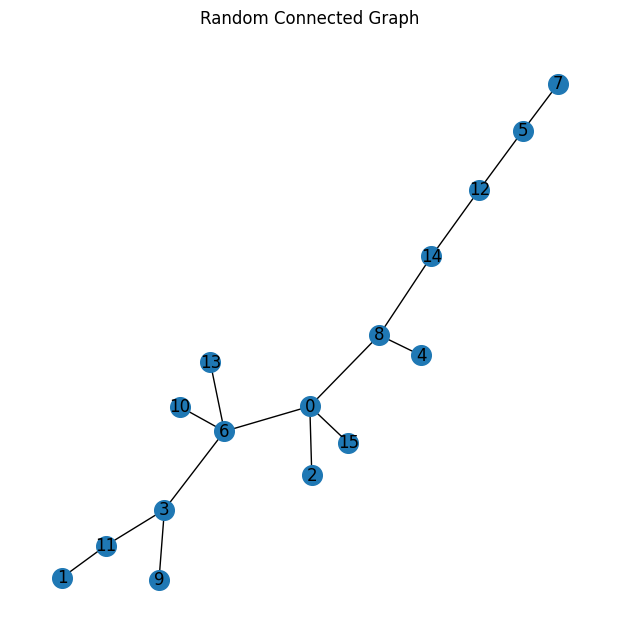

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

num_nodes = 16  # Number of nodes

# Create a random connected graph by generating a random spanning tree
random_connected_graph = nx.random_tree(num_nodes)

# Add additional edges to maintain connectivity
while not nx.is_connected(random_connected_graph):
    node1 = random.choice(list(random_connected_graph.nodes()))
    node2 = random.choice(list(random_connected_graph.nodes()))
    if node1 != node2 and not random_connected_graph.has_edge(node1, node2):
        random_connected_graph.add_edge(node1, node2)

plt.figure(figsize=(6, 6))
nx.draw(random_connected_graph, with_labels=True, node_size=200)
plt.title("Random Connected Graph")
plt.show()

In [4]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

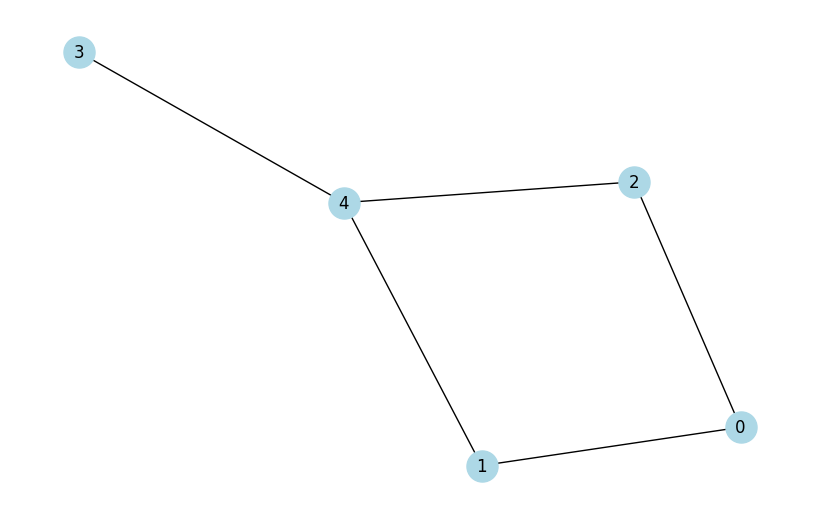

In [5]:
from itertools import combinations, groupby
import networkx as nx
import random

nodes = random.randint(5,15)
seed = random.randint(1,15)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [6]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Define the number of nodes in each set
num_nodes = 20  # You can adjust this to your desired number

# Create two sets of nodes with equal size
nodes_set1 = range(1, num_nodes + 1)
nodes_set2 = range(num_nodes + 1, 2 * num_nodes + 1)

# Add nodes to the graph
G.add_nodes_from(nodes_set1)
G.add_nodes_from(nodes_set2)

# Connect nodes from the two sets to create edges
for node1 in nodes_set1:
    for node2 in nodes_set2:
        G.add_edge(node1, node2)

# Now, G is a graph that can be divided into two equal-sized sets.

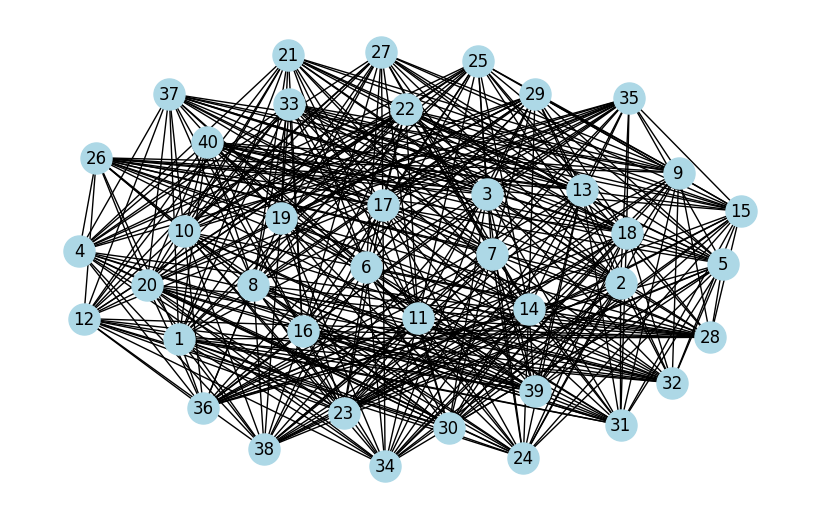

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue',
        with_labels=True,
        node_size=500)

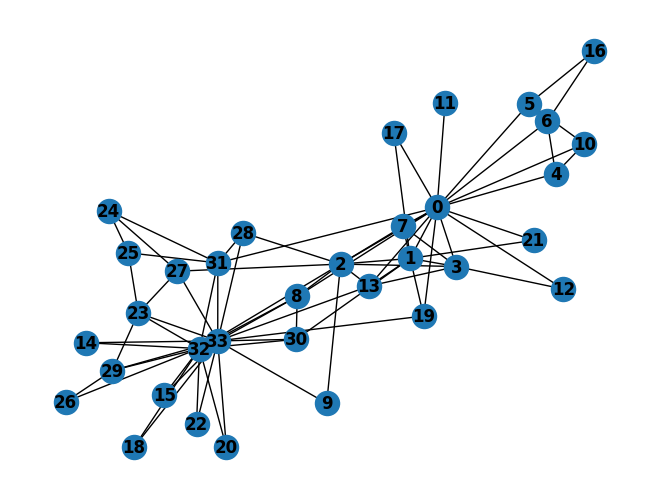

In [8]:
 G = nx.karate_club_graph()
 nx.draw(G, with_labels=True, font_weight='bold')

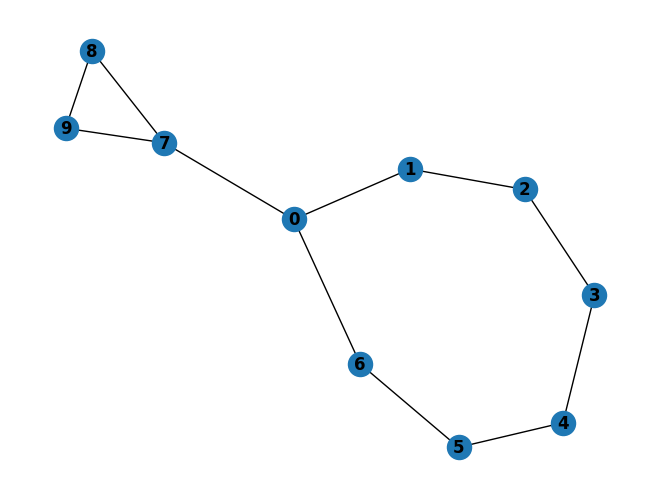

In [9]:
import networkx as nx

# Create a networkx graph object
G = nx.Graph()

# Add edges to to the graph object
# Each tuple represents an edge between two nodes
G.add_edges_from([
                        (0,1),
                        (1,2),
                        (2,3),
                        (3,4),
                        (4,5),
                        (5,6),
                        (0,7),
                        (7,8),
                        (8,9),(6,0),(9,7)])

# Draw the resulting graph
nx.draw(G, with_labels=True, font_weight='bold')

In [10]:
G = random_connected_graph

In [11]:
A=nx.adjacency_matrix(G)
print(" — — — — — — — — — -ADJACENCY MATRIX — — — — — — — — — — — -")
print(A.todense())
print("-"*50)
print(" — — — — — — — — — -DIAGONAL MATRIX = DEGREE OF EACH NODE — — — — — — — — — — — -")
print(G.degree)
L = nx.laplacian_matrix(G).astype(float)
print("-"*50)
print(" — — — — — — — — — -LAPLACIAN MATRIX — — — — — — — — — — — -")
print(L.todense())


 — — — — — — — — — -ADJACENCY MATRIX — — — — — — — — — — — -
[[0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
--------------------------------------------------
 — — — — — — — — — -DIAGONAL MATRIX = DEGREE OF EACH NODE — — — — — — — — — — — -
[(0, 4), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 4), (7, 1), (8, 3), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 2), (15, 1)]
--------------------------------------------------
 — — — — — — — — — -LAPLACIAN MATRIX — — — — — — — — — — — 

C:\Users\erend\AppData\Local\Temp\ipykernel_28596\2238111369.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(G)
<class 'networkx.utils.decorators.argmap'> compilation 48:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [12]:
import scipy as sp
w,v = sp.sparse.linalg.eigsh(L, k = 2, which="SM")
print(w)
print(v)

[2.65982398e-16 8.26913698e-02]
[[ 0.25        0.01845075]
 [ 0.25        0.32930045]
 [ 0.25        0.020114  ]
 [ 0.25        0.24986125]
 [ 0.25       -0.13345324]
 [ 0.25       -0.41323943]
 [ 0.25        0.15446708]
 [ 0.25       -0.45049116]
 [ 0.25       -0.12241781]
 [ 0.25        0.27238515]
 [ 0.25        0.16839161]
 [ 0.25        0.30207014]
 [ 0.25       -0.34181636]
 [ 0.25        0.16839161]
 [ 0.25       -0.24212803]
 [ 0.25        0.020114  ]]


c:\Users\erend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


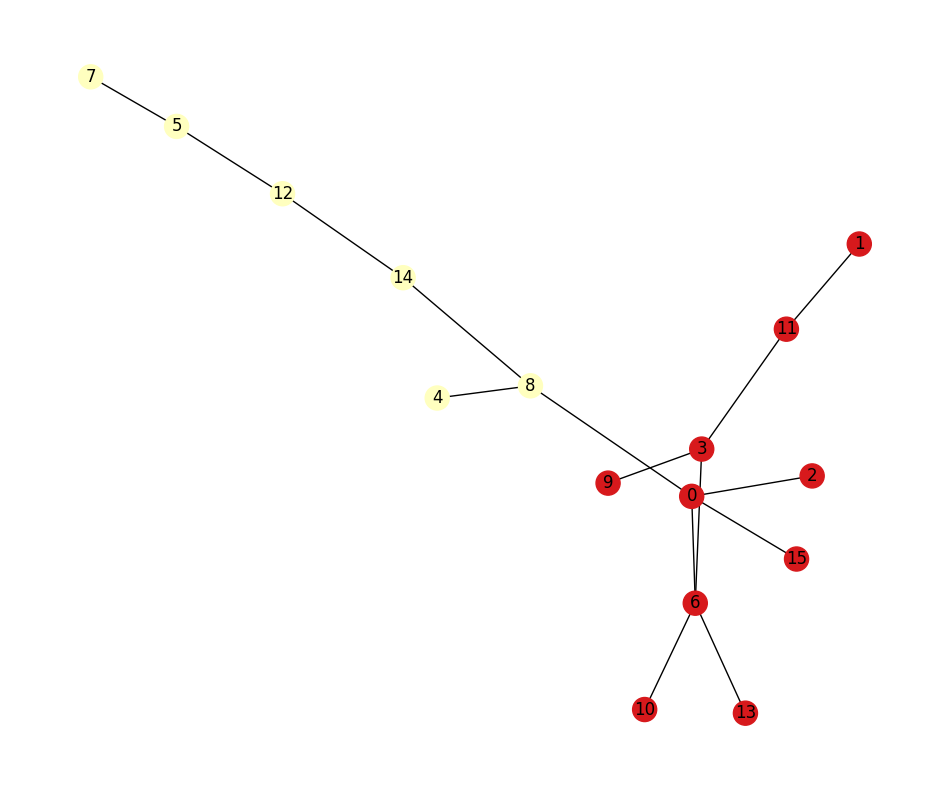

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = v*w
kmeans = KMeans(init="k-means++", n_clusters=2)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_
fig = plt.subplots(1, figsize=(12,10))
colors = ['#d7191c', '#ffffbf', '#2b83ba']
node_colors = [ colors[labels[v]] for v in G.nodes()]
nx.draw(G, node_color=node_colors, with_labels='True')

In [14]:
import networkx as nx
from networkx.algorithms import community
blocks = community.kernighan_lin.kernighan_lin_bisection(random_connected_graph, max_iter=10)
blocks

({1, 3, 6, 9, 10, 11, 13, 15}, {0, 2, 4, 5, 7, 8, 12, 14})

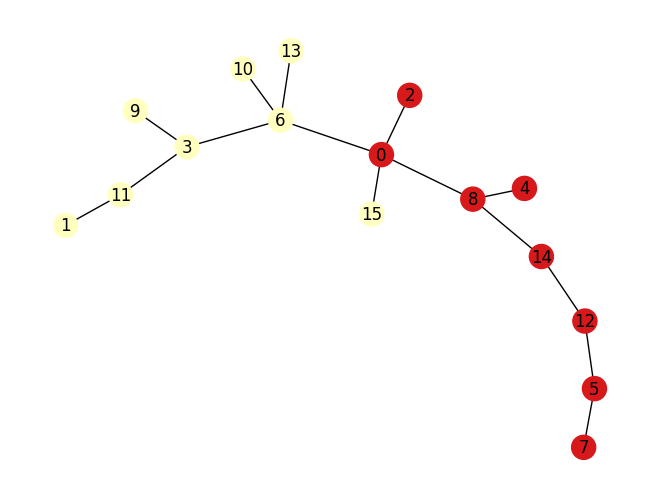

In [15]:
labels = [0] * len(random_connected_graph.nodes())
for i in blocks[0]:
  labels[i]=1
colors = ['#d7191c', '#ffffbf', '#2b83ba']
node_colors = [ colors[labels[v]] for v in random_connected_graph.nodes()]
nx.draw(random_connected_graph, node_color=node_colors, with_labels='True')

In [3]:
pip install node2vec

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 80.86it/s]


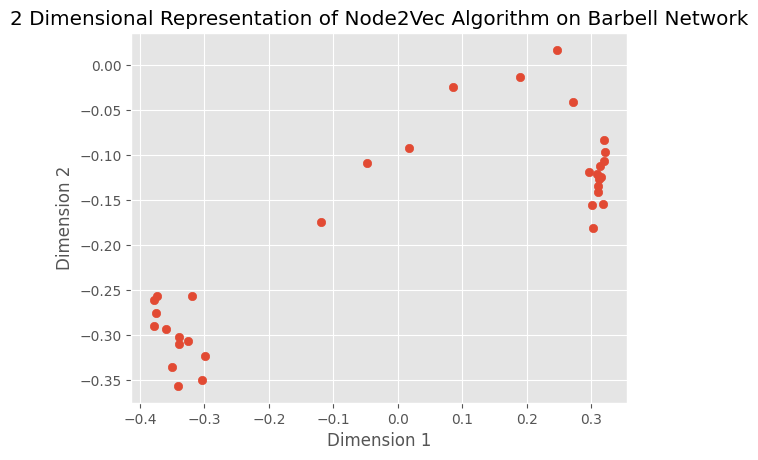

In [6]:
import random
import networkx as nx
import matplotlib.pyplot as plt

from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder

# ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 
# 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 
# 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 
# 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 
# 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 
# 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
# plt.style.use("ggplot")
plt.style.use("seaborn-v0_8")

# generate barbell network
G = nx.barbell_graph(
    m1 = 13,
    m2 = 7
)

# node embeddings
def run_n2v(G, dimensions=64, walk_length=80, num_walks=10, p=1, q=1, window=10):
    """
    Given a graph G, this method will run the Node2Vec algorithm trained with the
    appropriate parameters passed in.

    Args:
        G (Graph) : The network you want to run node2vec on

    Returns:
        This method will return a model

    Example:
        G = np.barbell_graph(m1=5, m2=3)
        mdl = run_n2v(G)
    """

    mdl = Node2Vec(
        G,
        dimensions=dimensions,
        walk_length=walk_length,
        num_walks=num_walks,
        p=p,
        q=q
    )
    mdl = mdl.fit(window=window)
    return mdl

mdl = run_n2v(G)

# visualize node embeddings
x_coord = [mdl.wv.get_vector(str(x))[0] for x in G.nodes()]
y_coord = [mdl.wv.get_vector(str(x))[1] for x in G.nodes()]

plt.clf()
plt.scatter(x_coord, y_coord)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("2 Dimensional Representation of Node2Vec Algorithm on Barbell Network")
plt.show()

In [26]:
[mdl.wv.get_vector(str(x)) for x in G.nodes()]

[array([ 0.06654689,  0.14759456,  0.3177983 ,  0.18291241,  0.13604636,
        -0.4090685 , -0.09127335,  0.17167935,  0.24124269, -0.1054984 ,
        -0.01618116,  0.22152877,  0.47722328, -0.21050596, -0.15274414,
         0.12306128, -0.05796303,  0.3430466 ,  0.2103395 ,  0.47702396,
         0.27762547, -0.20638628,  0.73180693, -0.10375315,  0.16991512,
         0.15772395, -0.27014917, -0.12801173,  0.19767678, -0.34212637,
         0.01426561,  0.33560157, -0.39675587, -0.1723288 , -0.03946574,
         0.07477213,  0.06134008,  0.17562425,  0.21537073,  0.43396875,
         0.70847756,  0.21811073, -0.08337148, -0.5320602 ,  0.04042013,
         0.01456669, -0.07554726, -0.07592385, -0.08258867, -0.1440337 ,
        -0.16939902, -0.00073263,  0.13704953,  0.36426505,  0.16629523,
         0.56030566,  0.13267617,  0.00433881,  0.04672845, -0.29298425,
         0.20521979,  0.04159536,  0.10501308,  0.2846212 ], dtype=float32),
 array([ 0.05209201,  0.15204176,  0.2958934 , 